# mpra_analyze_H9D10

Margaret Guo

12/10/2020

In [1]:
library(MPRAnalyze)
library(tidyverse)
library(pheatmap)
# library(mpra)
# library(QuASAR)
# library(BiocParallel)
# library(stringr)
# library(reshape2)
# library(ggplot2)
# library(gridExtra)
# library(VennDiagram)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
getwd()

[1] "/Users/mguo123/Google Drive/1_khavari/noncancer_project/miseq/novogene_071420"

In [3]:
list.files(getwd())

[1] "~$snp_all_results_withgene.xlsx"                                
  [2] "1A1_mpra_analyze_293T-nobatch.ipynb"                            
  [3] "1A2_mpra_analyze_AST-nobatch.ipynb"                             
  [4] "1A3_mpra_analyze_H9D0-nobatch.ipynb"                            
  [5] "1B1_mpra_analyze_293T.ipynb"                                    
  [6] "1B2_mpra_analyze_AST-batch1.ipynb"                              
  [7] "1B2_mpra_analyze_AST.ipynb"                                     
  [8] "1B3_mpra_analyze_H9D0.ipynb"                                    
  [9] "1B4_mpra_analyze_H9D2.ipynb"                                    
 [10] "1B5_mpra_analyze_H9D4.ipynb"                                    
 [11] "1B6_mpra_analyze_H9D10.ipynb"                                   
 [12] "1B7_mpra_analyze_SL.html"                                       
 [13] "1B7_mpra_analyze_SL.ipynb"                                      
 [14] "1B8_mpra_analyze_SLC.ipynb"                                     
 [15] "1C1_mpra_analyze_293T-dedup.ipynb"                              
 [16] "1C2_mpra_analyze_AST-dedup.ipynb"                               
 [17] "1C3_mpra_analyze_H9D0-dedup.ipynb"                              
 [18] "1C4_mpra_analyze_H9D2-dedup.ipynb"                              
 [19] "1C5_mpra_analyze_H9D4-dedup.ipynb"                              
 [20] "1C6_mpra_analyze_H9D10-dedup.ipynb"                             
 [21] "1C7_mpra_analyze_SL-dedup.ipynb"                                
 [22] "1C8_mpra_analyze_SLC-dedup.ipynb"                               
 [23] "1D1_mpra_analyze_293T-dedup-barcodeallele.ipynb"                
 [24] "1D2_mpra_analyze_AST-dedup-barcodeallele.ipynb"                 
 [25] "1D3_mpra_analyze_H9D0-dedup-barcodeallele.ipynb"                
 [26] "1D4_mpra_analyze_H9D2-dedup-barcodeallele.ipynb"                
 [27] "1D5_mpra_analyze_H9D4-dedup-barcodeallele.ipynb"                
 [28] "1D6_mpra_analyze_H9D10-dedup-barcodeallele.ipynb"               
 [29] "1D7_mpra_analyze_SL-dedup-barcodeallele.ipynb"                  
 [30] "1D8_mpra_analyze_SLC-dedup-barcodeallele.ipynb"                 
 [31] "2_mpra_gene_analysis.ipynb"                                     
 [32] "2B_mpra_gene_analysis2.ipynb"                                   
 [33] "2BR_mpra_gene_analysis2.ipynb"                                  
 [34] "2C_mpra_gene_analysis-barcodeallele.ipynb"                      
 [35] "2D_mpra_gene_analysis2-barcodeallele.ipynb"                     
 [36] "2DR_mpra_gene_analysis2-barcodeallele.ipynb"                    
 [37] "3_get_cgenes.ipynb"                                             
 [38] "3R_cgene_R.ipynb"                                               
 [39] "4_cmap_egenes.ipynb"                                            
 [40] "4_run_stams_psychmpra_res.nb.html"                              
 [41] "4_run_stams_psychmpra_res.Rmd"                                  
 [42] "8A_common_genes.html"                                           
 [43] "B_mpraanalyze_bc_plus_allele"                                   
 [44] "cgene"                                                          
 [45] "cmap_egenes"                                                    
 [46] "common_dz.csv"                                                  
 [47] "Copy of NovoLibrarySIF Stanford-NVUS2020061523_DLR_6.18.20.xlsx"
 [48] "corr_lanecol.pdf"                                               
 [49] "corr_lanecollapse.csv"                                          
 [50] "corr.csv"                                                       
 [51] "corr.pdf"                                                       
 [52] "D_mpraanalyze_barcode_allelic"                                  
 [53] "dedup_counts"                                                   
 [54] "drug_all_egene.csv"                                             
 [55] "dz_gene_bin_dict.csv"                                           
 [56] "dz_gene_bin_dztree.pdf"            

In [4]:
count_rna = read.csv('dedup_counts/count_matrix.csv',row.names=1)
head(count_rna)

,AST_1_L1,AST_1_L2,AST_2_L1,AST_2_L2,H4_D4_1_L1,H4_D4_1_L2,H9_D0_1A_L1,H9_D0_1A_L2,H9_D0_1B_L1,H9_D0_1B_L2,⋯,SL_1_L1,SL_1_L2,SL_2_L1,SL_2_L2,SL_3A_L1,SL_3A_L2,SL_3B_L1,SL_3B_L2,SL_4_L1,SL_4_L2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr5.109076112.Ref.C.3,151,138,97,72,141,143,22,17,30,33,⋯,43,40,88,61,40,32,33,28,61,55
chr10.62185494.Ref.C.7,60,52,61,50,42,41,17,19,11,9,⋯,39,33,21,25,23,13,31,32,34,36
chr2.74455472.all_alt.T.6,529,428,104,89,332,314,119,115,106,101,⋯,193,149,163,164,107,77,131,110,232,210
chr6.27799470.all_alt.G.9,404,377,180,159,236,207,74,76,52,45,⋯,88,79,96,87,59,37,82,67,88,90
chr11.47270255.all_alt.T.8,76,76,54,41,62,49,21,17,13,8,⋯,25,23,34,34,42,39,37,38,21,19
chr10.107594646.Ref.G.10,306,276,48,52,186,181,30,26,23,26,⋯,65,57,91,82,57,53,12,9,82,84


In [5]:
colnames(count_rna)

[1] "AST_1_L1"    "AST_1_L2"    "AST_2_L1"    "AST_2_L2"    "H4_D4_1_L1" 
 [6] "H4_D4_1_L2"  "H9_D0_1A_L1" "H9_D0_1A_L2" "H9_D0_1B_L1" "H9_D0_1B_L2"
[11] "H9_D0_2_L1"  "H9_D0_2_L2"  "H9_D10_1_L1" "H9_D10_1_L2" "H9_D10_2_L1"
[16] "H9_D10_2_L2" "H9_D10_3_L1" "H9_D10_3_L2" "H9_D10_4_L1" "H9_D10_4_L2"
[21] "H9_D2_1_L1"  "H9_D2_1_L2"  "H9_D2_2_L1"  "H9_D2_2_L2"  "H9_D2_3_L1" 
[26] "H9_D2_3_L2"  "H9_D2_4_L1"  "H9_D2_4_L2"  "H9_D4_2_L1"  "H9_D4_2_L2" 
[31] "H9_D4_3A_L1" "H9_D4_3A_L2" "H9_D4_3B_L1" "H9_D4_3B_L2" "HEK293_1_L1"
[36] "HEK293_1_L2" "HEK293_2_L1" "HEK293_2_L2" "HEK293_3_L1" "HEK293_3_L2"
[41] "SLC_1_L1"    "SLC_1_L2"    "SLC_2_L1"    "SLC_2_L2"    "SLC_3_L1"   
[46] "SLC_3_L2"    "SLC_4_L1"    "SLC_4_L2"    "SL_1_L1"     "SL_1_L2"    
[51] "SL_2_L1"     "SL_2_L2"     "SL_3A_L1"    "SL_3A_L2"    "SL_3B_L1"   
[56] "SL_3B_L2"    "SL_4_L1"     "SL_4_L2"

In [6]:
get_tables = function(miseq_out){
miseq_out$id = as.character(miseq_out$id)
miseq_out = miseq_out%>%
    select(id, count)%>%
    separate(id, c("chr", "loc", "allele_info", "letter", "bc_id"), sep='[.]')%>%
    mutate(allele = ifelse(grepl("Ref",miseq_out$id),'ref','alt'))%>%
    mutate(column = str_c(allele, bc_id, sep = '_'))%>%
    mutate(snp_name = str_c(chr, loc, sep = '_'))%>%
    select(snp_name, count, column, allele, bc_id )%>%
    group_by(snp_name, column)%>%
    summarise(count = sum(count),
            allele = unique(allele),
            bc_id = unique(bc_id))%>%
    ungroup()

    colAnnon = miseq_out%>%
        select( -snp_name,-count)%>%
        mutate(barcode_allelic =  as.factor(str_c(allele, bc_id, sep = '_')))%>%
        distinct()%>%
        arrange(column)%>%
        column_to_rownames('column')
    
    countTable = miseq_out%>%
        select(-allele, -bc_id)%>%
        spread(column,count)%>%
        replace(is.na(.), 0)%>%
        arrange(snp_name)%>%
        column_to_rownames('snp_name')
#     countTable = as.matrix(countTable)
    return(list(colAnnon, countTable))
}

get_tables_withbatch = function(miseq_out){
miseq_out$id = as.character(miseq_out$id)
miseq_out = miseq_out%>%
    select(id, count,batch)%>%
    separate(id, c("chr", "loc", "allele_info", "letter", "bc_id"), sep='[.]')%>%
    mutate(allele = ifelse(grepl("Ref",miseq_out$id),'ref','alt'))%>%
    mutate(column = str_c(allele, bc_id, batch, sep = '_'))%>%
    mutate(snp_name = str_c(chr, loc, sep = '_'))%>%
    select(snp_name, count, column, allele, bc_id, batch )%>%
    group_by(snp_name, column, batch)%>%
    summarise(count = sum(count),
            allele = unique(allele),
            bc_id = unique(bc_id))%>%
    ungroup()

    colAnnon = miseq_out%>%
        select( -snp_name,-count)%>%
        mutate(barcode_allelic =  as.factor(str_c(allele, bc_id, sep = '_')))%>%
        distinct()%>%
        arrange(column)%>%
        column_to_rownames('column')

    countTable = miseq_out%>%
        select(-allele, -bc_id, -batch)%>%
        spread(column,count)%>%
        replace(is.na(.), 0)%>%
        arrange(snp_name)%>%
        column_to_rownames('snp_name')
#     countTable = as.matrix(countTable)

    return(list(colAnnon, countTable))
}

# read_rna_count_csv = function(rna_count_csv){
    
# }

In [7]:
# read in dna
dna_df = read.csv('../miseq_mg_081019/libpsych_plasmid_qc_701_501_count.csv')
result_dna = get_tables(dna_df)
colAnnon_dna = result_dna[[1]]
dnaCount = result_dna[[2]]

In [8]:
colAnnon_dna

,allele,bc_id,barcode_allelic
,<chr>,<chr>,<fct>
alt_1,alt,1,alt_1
alt_10,alt,10,alt_10
alt_2,alt,2,alt_2
alt_3,alt,3,alt_3
alt_4,alt,4,alt_4
alt_5,alt,5,alt_5
alt_6,alt,6,alt_6
alt_7,alt,7,alt_7
alt_8,alt,8,alt_8


### IMPORTANT ADD IN TISSUE SPECIFIC INFO BELOW

#### HEK293T
save_prefix = 'mpraanalyze_HEK293_'
sample_ids = c('HEK293_1', 'HEK293_2', 'HEK293_3')

#### Astrocytes (AST)
save_prefix = 'mpraanalyze_AST1_'
sample_ids = c('AST_1', 'AST_2')

#### H9-D0
save_prefix = 'mpraanalyze_H9D0_'
sample_ids = c('H9_D0_1A', 'H9_D0_1B', 'H9_D0_2')


#### H9-D2
save_prefix = 'mpraanalyze_H9D2_'
sample_ids = c('H9_D2_1', 'H9_D2_2', 'H9_D2_3', 'H9_D2_4')


#### H9-D4 (removed H9_D4_3A because of clustering issues)
save_prefix = 'mpraanalyze_H9D4_'
sample_ids = c('H4_D4_1', 'H9_D4_2', 'H9_D4_3B')


#### H9-D10 (removed H9_D10_2 because of clustering issues)
save_prefix = 'mpraanalyze_H9D10_'
sample_ids = c('H9_D10_1', 'H9_D10_4', 'H9_D10_3')


#### SL
save_prefix = 'mpraanalyze_SL_'
sample_ids = c('SL_1', 'SL_2', 'SL_3A', 'SL_3B', 'SL_4)


#### SLC
save_prefix = 'mpraanalyze_SLC_'
sample_ids = c('SLC_1', 'SLC_2', 'SLC_3',  'SLC_4)


In [9]:
#### H9-D10 (removed H9_D10_2 because of clustering issues)
save_prefix = 'D_mpraanalyze_barcode_allelic/mpraanalyze_H9D10_'
sample_ids = c('H9_D10_1', 'H9_D10_4', 'H9_D10_3')

tissue = 'H9_D10'





In [11]:
rna_df= data.frame()
for (sample_id in sample_ids){
    # read in each lane
    rna_df_rep_L1 = read.csv(paste0('dedup_counts/',sample_id,  '_L1_libpsych_virus_dupumi_count.csv'))
    rna_df_rep_L1 = dplyr::select(rna_df_rep_L1, id, count)
    rna_df_rep_L2 = read.csv(paste0('dedup_counts/',sample_id,  '_L2_libpsych_virus_dupumi_count.csv'))
    rna_df_rep_L2 = dplyr::select(rna_df_rep_L2, id, count)
    
    # merge lanes by summing and add a variable indicating batch
    rna_df_rep = full_join(rna_df_rep_L1,rna_df_rep_L2,by='id')
    rna_df_rep$count.x[is.na(rna_df_rep$count.x)] = 0 
    rna_df_rep$count.y[is.na(rna_df_rep$count.y)] = 0
    rna_df_rep$count= rna_df_rep$count.x +rna_df_rep$count.y
    rna_df_rep$batch= tail(strsplit(sample_id,'_')[[1]],n=1)
    
    #add to overall dataframe
    rna_df = rbind(rna_df, rna_df_rep)
    
}



Warning message:
“Column `id` joining factors with different levels, coercing to character vector”
Warning message:
“Column `id` joining factors with different levels, coercing to character vector”
Warning message:
“Column `id` joining factors with different levels, coercing to character vector”


In [12]:
# get overall dataframe and annotations

result_rna = get_tables_withbatch(rna_df)
colAnnon_rna = result_rna[[1]]
rnaCount = result_rna[[2]]


result_rna_nobatch = get_tables(rna_df)
colAnnon_rna_nobatch = result_rna_nobatch[[1]]
rnaCount_nobatch = result_rna_nobatch[[2]]

In [13]:
# filter dna for those found in rna
dnaCount_new = dnaCount %>% 
    rownames_to_column('snpname') %>%
    filter(row.names(dnaCount) %in% row.names(rnaCount))%>%
    column_to_rownames('snpname')

# filter rna for those found in dna
rnaCount_new = rnaCount %>% 
    rownames_to_column('snpname') %>%
    filter(row.names(rnaCount) %in% row.names(dnaCount_new))%>%
    column_to_rownames('snpname')


# filter rna for those found in dna
rnaCount_nobatch_new = rnaCount_nobatch %>% 
    rownames_to_column('snpname') %>%
    filter(row.names(rnaCount_nobatch) %in% row.names(dnaCount_new))%>%
    column_to_rownames('snpname')
rnaCount_nobatch_new = rnaCount_nobatch_new[rownames(dnaCount_new),colnames(dnaCount_new)]

In [14]:
dim(dnaCount)
dim(rnaCount)
dim(dnaCount_new)
dim(rnaCount_new)
dim(rnaCount_nobatch_new)

[1] 2219   20

[1] 2203   60

[1] 2202   20

[1] 2202   60

[1] 2202   20

In [15]:
colAnnon_dna

,allele,bc_id,barcode_allelic
,<chr>,<chr>,<fct>
alt_1,alt,1,alt_1
alt_10,alt,10,alt_10
alt_2,alt,2,alt_2
alt_3,alt,3,alt_3
alt_4,alt,4,alt_4
alt_5,alt,5,alt_5
alt_6,alt,6,alt_6
alt_7,alt,7,alt_7
alt_8,alt,8,alt_8


# MPRAnalyze

In [16]:
# create MpraObject
obj <- MpraObject(dnaCounts = as.matrix(dnaCount_new), rnaCounts = as.matrix(rnaCount_new), 
                  dnaAnnot = colAnnon_dna, rnaAnnot = colAnnon_rna)

In [18]:
# ## Data Normalization
# ## If the library factors are different for the DNA and RNA data, separate 
# ## estimation of these factors is needed. We can also change the estimation 
# ## method (Upper quartile by default)
obj <- estimateDepthFactors(obj, #lib.factor = c("allele", "bc_id"),
                            which.lib = "dna", 
                            depth.estimator = "uq")

obj <- estimateDepthFactors(obj, lib.factor = c("batch"),#lib.factor = c("allele"),
                            which.lib = "rna", 
                            depth.estimator = "uq")
# obj <- estimateDepthFactors(obj, lib.factor = c("allele"),
#                             which.lib = "rna", 
#                             depth.estimator = "uq")


## Quantitative Analysis
These estimates can then be used to identify and classify SNPs that induce a higher transcription rate (ASE aka Allele specific expression)

In [19]:
# obj <- analyzeQuantification(obj = obj, 
#                               dnaDesign = ~ bc_id + allele,
#                               rnaDesign = ~ allele+batch)

We can now extract the transcription rate estimates from the model, denoted ‘alpha values’ in the MPRAnalyze model, and use the testing functionality to test for activtiy. extracting alpha values is done with the getAlpha function, that will provide separate values per-factor if a factor is provided. In this case we want a separate alpha estimate by condition:

In [19]:
# ##extract alpha values from the fitted model
# alpha <- getAlpha(obj, by.factor = "allele")
# ##visualize the estimates
# par(bg='white')
# boxplot(alpha)

## Comparative Analysis
MPRAnalyze also supports comparative analyses, in this case: identifying enhancers that are differentially active between conditions. While we can do this indirectly by taking the quantification results and identify enhancers that are active in one condition but not the other, a direct compartive analysis is more sensitive, and allows identification of enhancers that are more or less active, avoiding the binarization of activity. MPRAnalyze also leverages negative controls to estbalish the null differential behavior, thereby correcting any systemic bias that may be present in the data. In terms of syntax, this analysis is done very similarly to quantification, with an additional reduced model that describes the null hypothesis. In this case, the null hypothesis is no differential activtiy between conditions, so the reduced model is an empty model (intercept only)

2212 steps for model takes around ~5-10 min to run

In [20]:
ptm <- proc.time()
obj <- suppressMessages(analyzeComparative(obj = obj, 
                          dnaDesign = ~ barcode_allelic,
                          rnaDesign = ~ allele, 
                          reducedDesign = ~ 1))
proc.time() - ptm
##

    user   system  elapsed 
1331.176   21.543 1360.914 

In [21]:
# with the fitted model, we can now test for differential activity, by calling testLrt
res <- testLrt(obj)

Performing Likelihood Ratio Test...



In [22]:
head(res)
summary(res)

,statistic,pval,fdr,df.test,df.dna,df.rna.full,df.rna.red,logFC
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
chr1_111243375,4.46318988,3.463277e-02,0.1985972666,1,20,3,2,-0.67030002
chr1_113938499,0.00644574,9.360103e-01,1.0000000000,1,20,3,2,-0.02199024
chr1_11712109,2.92123981,8.742067e-02,0.3433243369,1,8,3,2,-1.15184422
chr1_11831595,0.55109693,4.578698e-01,0.7592088701,1,18,3,2,-0.27584886
chr1_11831756,0.46204853,4.966681e-01,0.7789624275,1,19,3,2,-0.17590357
chr1_11831875,19.99794242,7.752554e-06,0.0003220967,1,20,3,2,0.69958814


   statistic             pval              fdr            df.test      
 Min.   :-68.3543   Min.   :0.00000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:  0.1893   1st Qu.:0.08596   1st Qu.:0.3426   1st Qu.:1.0000  
 Median :  1.0201   Median :0.31249   Median :0.6244   Median :1.0000  
 Mean   :  2.9213   Mean   :0.39040   Mean   :0.5915   Mean   :0.9855  
 3rd Qu.:  2.9484   3rd Qu.:0.66354   3rd Qu.:0.8843   3rd Qu.:1.0000  
 Max.   :135.9278   Max.   :1.00000   Max.   :1.0000   Max.   :1.0000  
                                                                       
     df.dna       df.rna.full      df.rna.red     logFC         
 Min.   : 3.00   Min.   :2.000   Min.   :2    Min.   :-6.49332  
 1st Qu.:17.00   1st Qu.:3.000   1st Qu.:2    1st Qu.:-0.34912  
 Median :19.00   Median :3.000   Median :2    Median :-0.06082  
 Mean   :17.66   Mean   :2.985   Mean   :2    Mean   :-0.05100  
 3rd Qu.:20.00   3rd Qu.:3.000   3rd Qu.:2    3rd Qu.: 0.28223  
 Max.   :21.00   Max.   :3.000   M

In [23]:
# for filtering out the snps with < 5 bc
bc_filt_num = 3
rna_df_up_filt = rna_df%>%
    separate(id, c("chr", "loc", "allele_info", "letter", "bc_id"), sep='[.]')%>%
    group_by(chr,loc, allele_info, letter)%>%
    summarise(num_bc = n())%>%
    ungroup()%>%
    filter(num_bc>bc_filt_num) %>%
    mutate(snp_name = str_c(chr, loc, sep = '_'))
snp_names_up_filt = rna_df_up_filt$snp_name
length(snp_names_up_filt)

[1] 4213

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.00   17.00   23.00   21.41   27.00   30.00 

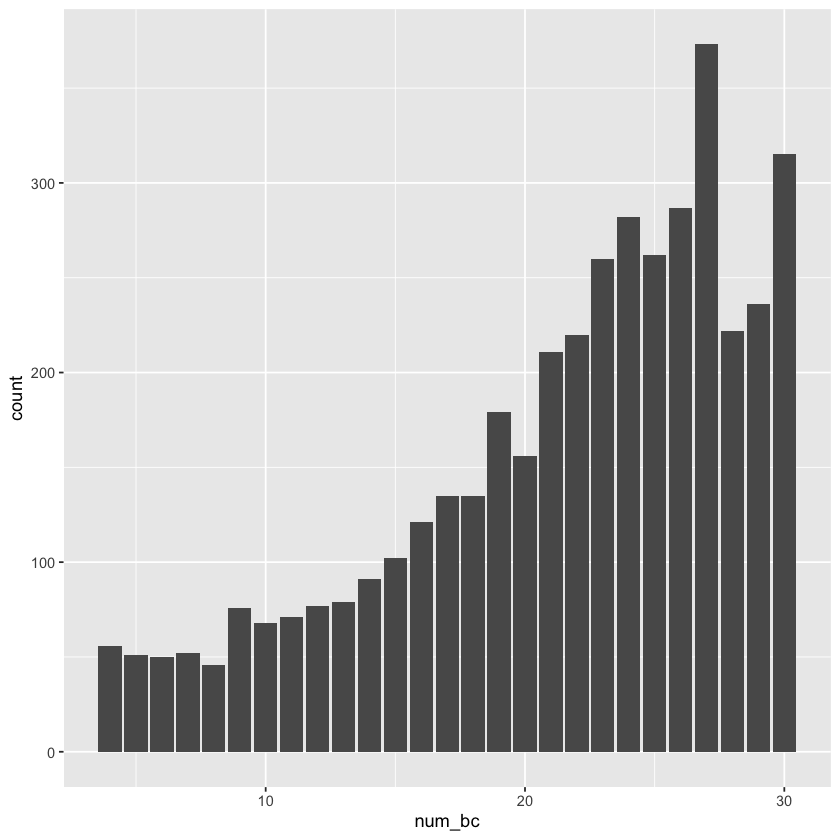

In [24]:
summary(rna_df_up_filt$num_bc)
ggplot(rna_df_up_filt,aes(x=num_bc))+geom_bar()

In [25]:
# # METHOD 1 dna normalized fold change
# res$normalt = log2(rowSums(rnaCount_nobatch_new[,1:10]+1)/rowSums(dnaCount_new[,1:10]+1))
# res$normref = log2(rowSums(rnaCount_nobatch_new[,11:20]+1)/rowSums(dnaCount_new[,11:20]+1))
# res$logFC = log2(res$normalt/res$normref)

#METHOD 2: just log2 ref/alt in rna
# res$logFC = log2(rowSums(rnaCount_nobatch_new[,1:10]+1)/rowSums(rnaCount_nobatch_new[,11:20]+1))

# # trimming
# res$pval =  pmax(res$pval, 1e-6)
# res$logFC =  pmin(res$logFC, 10)
# res$logFC =  pmax(res$logFC, 1e-6)

In [26]:
dim(res)

[1] 2202    8

In [27]:
res = res%>%
    rownames_to_column()%>%
    filter(rowname %in% snp_names_up_filt)%>%
    mutate(neglog10_p = -log10(pval))%>%
    mutate(neglog10_p_x_logFC = neglog10_p*logFC)%>%
    arrange(desc(neglog10_p_x_logFC))%>%
    drop_na()


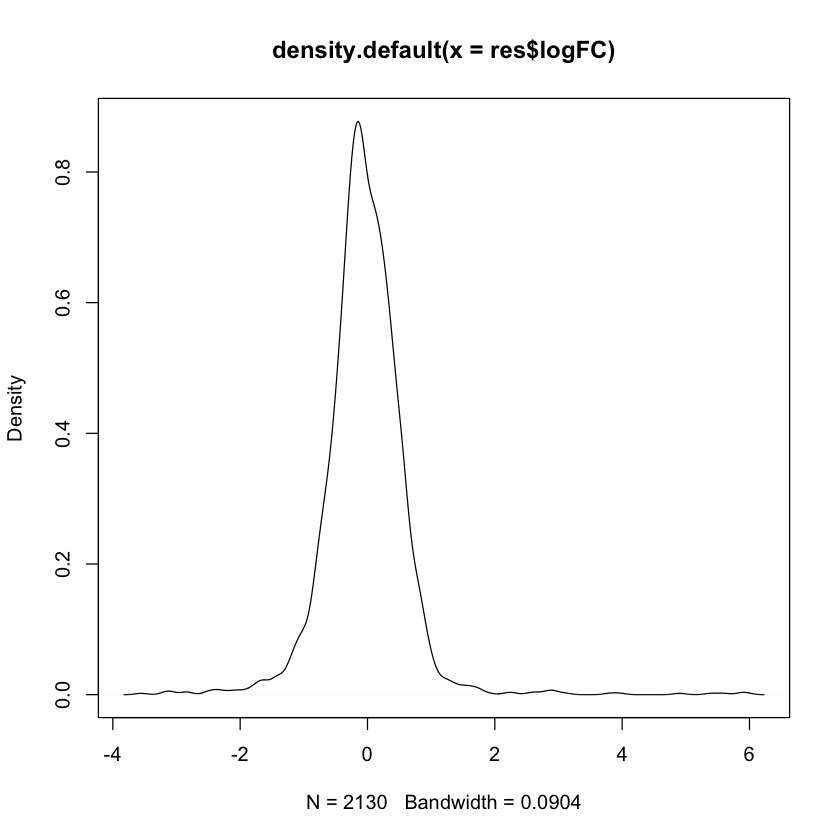

In [28]:
# When the hypothesis teseting is simple (two-condition comparison), a fold-change estimate is also available:

## plot log Fold-Change
par(bg='white')
plot(density(res$logFC))

pdf 
  2

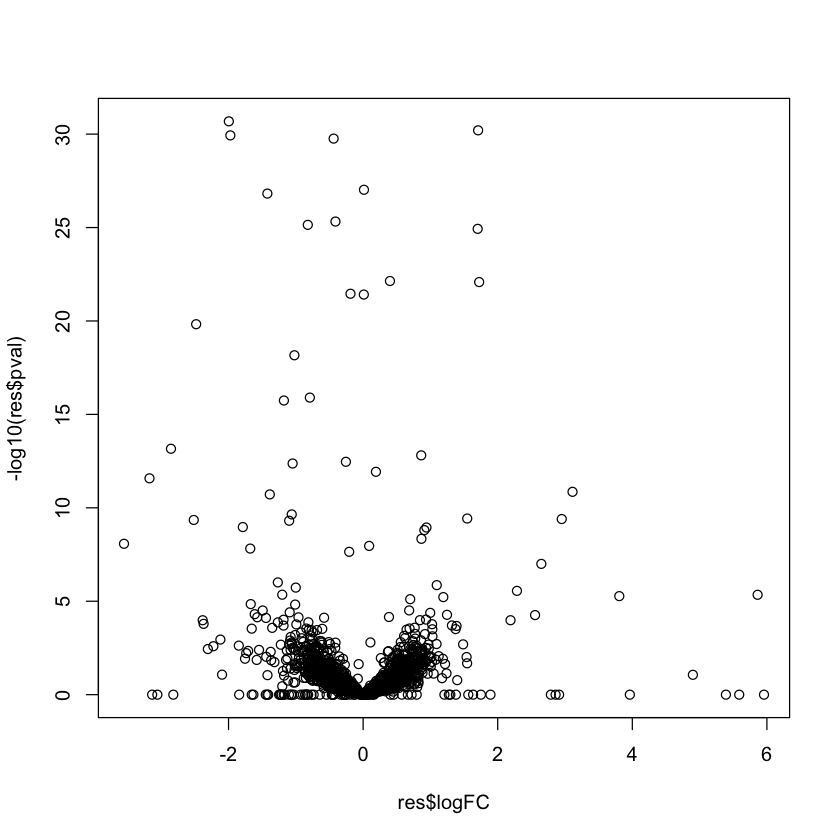

In [45]:
## plot volcano

par(bg='white')
plot(res$logFC, -log10(res$pval))

pdf(paste0(save_prefix, 'volcano.pdf'))
par(bg='white')
plot(res$logFC, -log10(res$pval))

dev.off()

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Saving 7 x 7 in image

Warning message:
“Removed 2 rows containing missing values (geom_point).”


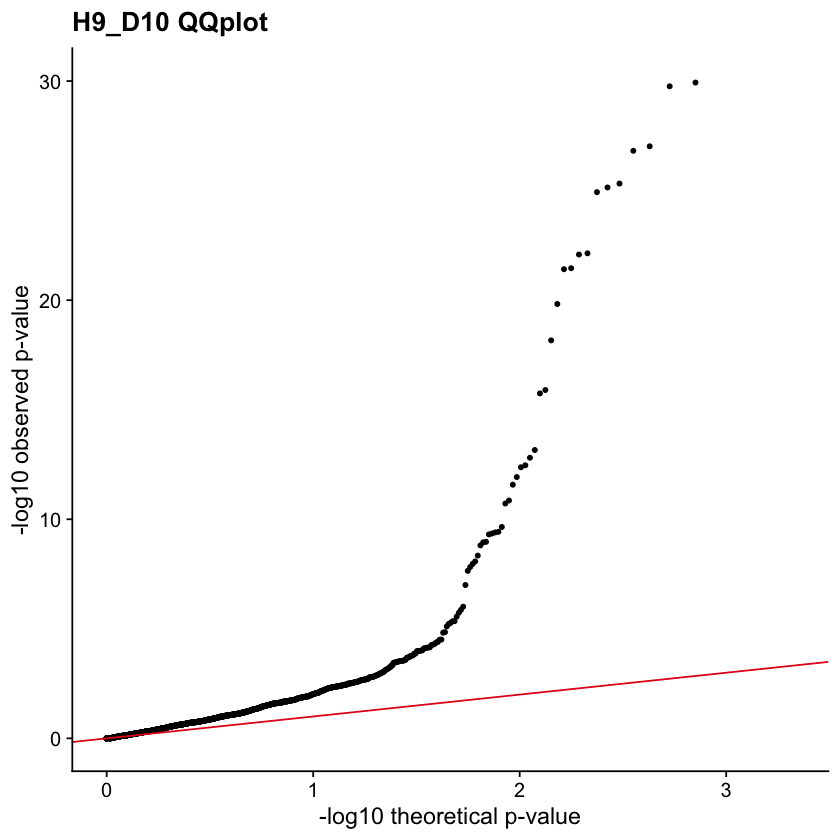

In [46]:
## plot qqplot

# pdf(paste0(save_prefix, 'volcano.pdf'))
par(bg='white')
qq_df = data.frame(emp_pval = sort(res$pval))

qq_df$theoretical_quantile = cume_dist(qq_df$emp_pval)

ggplot(qq_df, aes(x = -log10(theoretical_quantile), y = -log10(emp_pval)))+
    geom_point(size=1) +
    geom_abline(slope=1, intercept = 0, color = scales::brewer_pal(palette = "Set1")(1)[1]) +
  labs(x = "-log10 theoretical p-value", y = "-log10 observed p-value",
       title = paste0(tissue, " QQplot")) +  ylim(0, 30)+
  cowplot::theme_cowplot()
                                                        
ggsave(paste0(save_prefix, 'qqplot.pdf'))
# plot(1:length(-log10(res$pval)), -log10(res$pval))

# dev.off()

# annotate

In [10]:
res= read.csv('mpraanalyze_H9D10_comp.csv')

In [12]:
lib_csv = '../../psych_lib_info.csv'
lib_df = read.csv(lib_csv)
lib_df = mutate(lib_df, name_abbr = str_c(Chr, Position, sep='_'))
head(lib_df)

,X.1,name,X,Linked_SNP,Chr,Position,Index_SNP,Disease,DHS_tissue,eGene,⋯,dbscSNV.ada_score,dbscSNV.rf_score,RawScore,PHRED,num_disease,disease_interest,pass_thres_low,pass_thres,CADD_score_bool,name_abbr
,<int>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
1,1,chr1.111243375.all_alt.G,75004,rs12085135,chr1,111243375,rs12061304,panic disorder,t-helper_17_cell,,⋯,NA,NA,-0.197208,0.728,1,TRUE,TRUE,FALSE,NA,chr1_111243375
2,2,chr1.111243375.Ref.C,75004,rs12085135,chr1,111243375,rs12061304,panic disorder,t-helper_17_cell,,⋯,NA,NA,-0.197208,0.728,1,TRUE,TRUE,FALSE,NA,chr1_111243375
3,3,chr1.113938499.all_alt.C,1977,rs74395031,chr1,113938499,rs115870915,"type 2 diabetes,Obsessive Compulsive Disorder",astrocyte_of_the_spinal_cord,NA,⋯,NA,NA,0.309426,7.336,1,TRUE,TRUE,TRUE,NA,chr1_113938499
4,4,chr1.113938499.Ref.T,1977,rs74395031,chr1,113938499,rs115870915,"type 2 diabetes,Obsessive Compulsive Disorder",astrocyte_of_the_spinal_cord,NA,⋯,NA,NA,0.309426,7.336,1,TRUE,TRUE,TRUE,NA,chr1_113938499
5,5,chr1.11712109.all_alt.T,569,rs2103665,chr1,11712109,rs115049252,schizo,spleen,NA,⋯,NA,NA,0.193843,5.751,1,FALSE,TRUE,TRUE,NA,chr1_11712109
6,6,chr1.11712109.Ref.C,569,rs2103665,chr1,11712109,rs115049252,schizo,spleen,NA,⋯,NA,NA,0.193843,5.751,1,FALSE,TRUE,TRUE,NA,chr1_11712109


In [13]:
# thres = 0.05/dim(res)[1]
res_filt = res %>%
#     filter(pval < thres)
    filter(fdr<0.05)

dim(res)
dim(res_filt)

[1] 2130   12

[1] 153  12

In [14]:
res_filt

X,rowname,statistic,pval,fdr,df.test,df.dna,df.rna.full,df.rna.red,logFC,neglog10_p,neglog10_p_x_logFC
<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,chr6_108977663,133.725115,6.274869e-31,6.908630e-28,1,14,3,2,1.7088390,30.202395,51.611033
2,chr7_110872556,109.642069,1.173827e-25,2.871963e-23,1,13,3,2,1.7022080,24.930396,42.436720
3,chr14_105881748,96.648135,8.281036e-23,1.657713e-20,1,9,3,2,1.7244786,22.081915,38.079791
4,chr8_22479988,45.679554,1.392689e-11,1.135815e-09,1,8,3,2,3.1116834,10.856146,33.780889
5,chr17_17481353,21.034854,4.510039e-06,1.986221e-04,1,9,3,2,5.8619648,5.345820,31.337007
6,chr14_67446561,39.121188,3.982980e-10,2.829201e-08,1,9,3,2,2.9513682,9.399792,27.742247
7,chr17_17469918,20.714875,5.330033e-06,2.301320e-04,1,15,3,2,3.8064152,5.273270,20.072256
8,chr1_208002010,28.371496,1.001288e-07,5.127524e-06,1,10,3,2,2.6481196,6.999441,18.535357
9,chr5_159609391,39.242600,3.742842e-10,2.747246e-08,1,12,3,2,1.5467665,9.426798,14.581056


Warning message:
“Removed 6 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Saving 7 x 7 in image

Warning message:
“Removed 6 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”


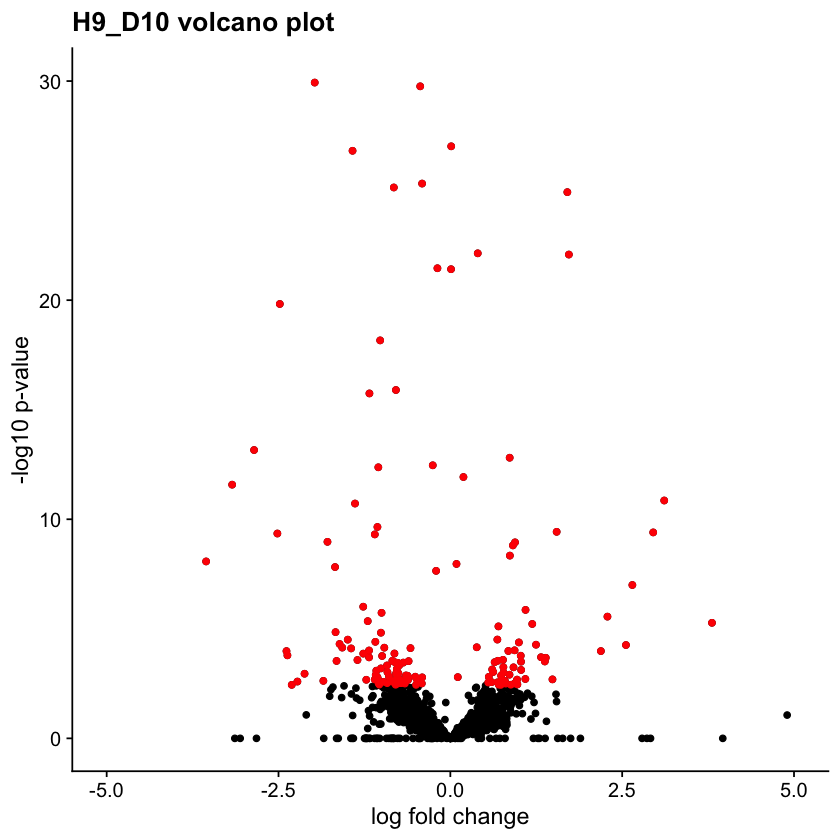

In [15]:
## plot volcano
# pdf(paste0(save_prefix, 'volcano.pdf'))
# par(bg='white')

ggplot(res, aes(x=logFC, y = -log10(pval))) + geom_point()+
 geom_point(data=res_filt, color='red')+
  labs(x = "log fold change", y = "-log10 p-value",
       title = paste0(tissue, " volcano plot")) + xlim(-5, 5)+ ylim(0,30)+
  cowplot::theme_cowplot()
# plot(res$logFC, -log10(res$pval),title(paste0(tissue, 'Volcano Plot')))
ggsave(paste0(save_prefix, 'volcano.pdf'))

# dev.off()

In [16]:
res_filt = res_filt %>%
    left_join(lib_df, by=c('rowname'='name_abbr'))

Warning message:
“Column `rowname`/`name_abbr` joining factor and character vector, coercing into character vector”


In [17]:
write.csv(res,paste0(save_prefix, 'comp.csv'))
write.csv(res_filt,paste0(save_prefix, 'comp_filt.csv'))


In [18]:
sort(unique(res_filt$GeneName))

[1] AC087491.2    AC096559.1    AGER          AGT           AKT1         
  [6] ALMS1         APOE          BTN2A3P       C1orf167      C2orf82      
 [11] C3orf38       C9orf78       CADM3         CCAR2         CENPM        
 [16] CLCN6         CSMD1         CTB-127C13.1  CTC-232P5.4   CTC-332L22.1 
 [21] CTD-2260A17.2 CTD-3035D6.2  CYP17A1-AS1   DCC           DTL          
 [26] ENOX1         FABP6         FADS2         FANCA         GALNT10      
 [31] GLIS3         GPHN          GPSM3         GRB10         HCG4         
 [36] HIST1H2AJ     HIST1H2AK     HIST1H2BL     HLA-B         IMMP2L       
 [41] JMJD1C        LPPR5         LRRC48        MAP7D1        MFAP3L       
 [46] MIR137HG      MIR182        MPHOSPH9      MTHFR         MTND4P15     
 [51] NEK1          PBX2          PCDH15        PCDHA1        PDLIM2       
 [56] PEMT          PGBD1         PKP1          PLAA          PRODH        
 [61] PRRG2         PSD3          PTK2B         PTPRVP        RAI1         
 [66] RARB          RERE          RN7SL692P     RNU6-468P     RP11-1220K2.2
 [71] RP11-136I14.4 RP11-159G9.5  RP11-166B2.1  RP11-313I2.13 RP11-325K19.1
 [76] RP11-431K24.1 RP11-474G23.3 RP11-488C13.5 RP11-56N19.5  RP11-895M11.2
 [81] RP13-631K18.2 RP4-555D20.3  RPL35AP4      RPS21         RSRC1        
 [86] RTTN          SHANK2        SLC4A5        SMEK1         SMOX         
 [91] SOX7          STOML1        TCF4          TENM2         TEX22        
 [96] TMEM106B      TMEM129       TRNAI2        WHSC1L1       Z83851.3     
[101] ZDHHC5       
641 Levels: ABCG1 AC002465.2 AC002480.2 AC002480.4 AC005076.5 ... ZSCAN31